# Devoir 1 : Séries Chronologiques

## Mohamed Tahiri & Abdellah El Arroud El Hadari

## DSE

## Analyse de série chronologique : Évolution du dollar par rapport à l'euro.

#### Importation nécessaire de bibliothèques

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

#### Description de donne : 

#### En 1999, le lancement officiel de l'euro a marqué le début d'une nouvelle ère pour 11 pays européens, qui ont adopté une politique monétaire commune sous la supervision de la Banque centrale européenne. Aujourd'hui, l'euro a plus de 20 ans d'existence.

#### Le jeu de données contient les taux de change de l'euro par rapport à diverses devises internationales, tels que le dollar australien, le real brésilien, le dollar canadien, etc. Ces taux de change sont généralement mis à jour quotidiennement vers 16h00 CET, sauf les jours de fermeture de TARGET.

#### Les données proviennent de l'entrepôt de données statistiques de la Banque centrale européenne et sont régulièrement mises à jour.

#### Ce code lit les 120 premières lignes d'un fichier CSV nommé 'euro-daily-hist_1999_2022.csv' et les stocke dans un DataFrame Pandas nommé `data`.

In [17]:
data = pd.read_csv('euro-daily-hist_1999_2022.csv',nrows=120)

#### `data.head()` affiche les cinq premières lignes du DataFrame `data`. Cela vous donne un aperçu des premières données contenues dans le DataFrame.

In [18]:
data.head()

,date,dollar
0,2020-01-02,1.1193
1,2020-01-03,1.1147
2,2020-01-06,1.1194
3,2020-01-07,1.1172
4,2020-01-08,1.1115


#### Ce code crée un graphique à l'aide de Matplotlib. Il affiche les données contenues dans la colonne 'dollar' du DataFrame `data` sur l'axe des ordonnées (axe vertical) et les indices des données sur l'axe des abscisses (axe horizontal). Le paramètre `figsize=(14,4)` définit la taille de la figure à 14 pouces de largeur et 4 pouces de hauteur.

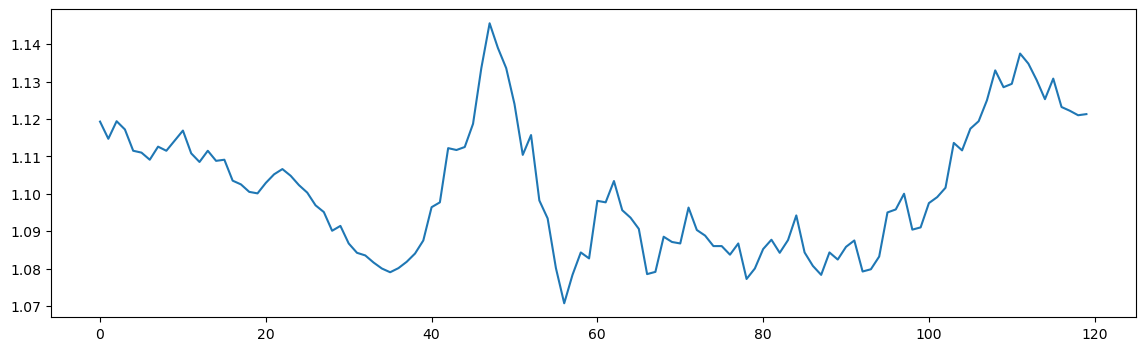

In [19]:
fig, ax = plt.subplots(figsize=(14,4))
data['dollar'].plot(ax=ax)
plt.show()

#### Ce code utilise la fonction `seasonal_decompose` de la bibliothèque statsmodels pour effectuer une décomposition saisonnière des données contenues dans la colonne 'dollar' du DataFrame `data`. La période de décomposition est définie sur 30, ce qui signifie qu'elle suppose qu'il y a une saisonnalité de 30 jours dans les données.

#### Ensuite, le code utilise la méthode `plot()` pour afficher les composants de la décomposition saisonnière, y compris la tendance, la saisonnalité et les résidus. Chaque composant est affiché dans un sous-graphique distinct.

#### Enfin, la fonction `plt.show()` est appelée pour afficher les graphiques.

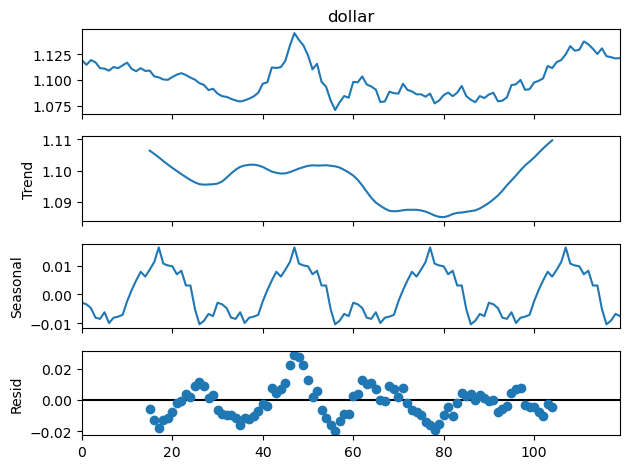

In [20]:
decomp = seasonal_decompose(data['dollar'],period=30)
decomp.plot()
plt.show()

#### Ce code crée un graphique avec deux sous-graphiques empilés verticalement à l'aide de Matplotlib. Dans le premier sous-graphique (`ax1`), il trace la fonction d'autocorrélation (ACF) pour les données de la colonne 'dollar' du DataFrame `data`, jusqu'à un décalage maximal de 37 jours. Dans le deuxième sous-graphique (`ax2`), il trace la fonction d'autocorrélation partielle (PACF) pour les mêmes données et avec le même nombre de décalages.

#### Les paramètres `sharex=False` et `sharey=False` indiquent que les axes x et y ne sont pas partagés entre les sous-graphiques.

#### Enfin, la fonction `plt.show()` est utilisée pour afficher le graphique.

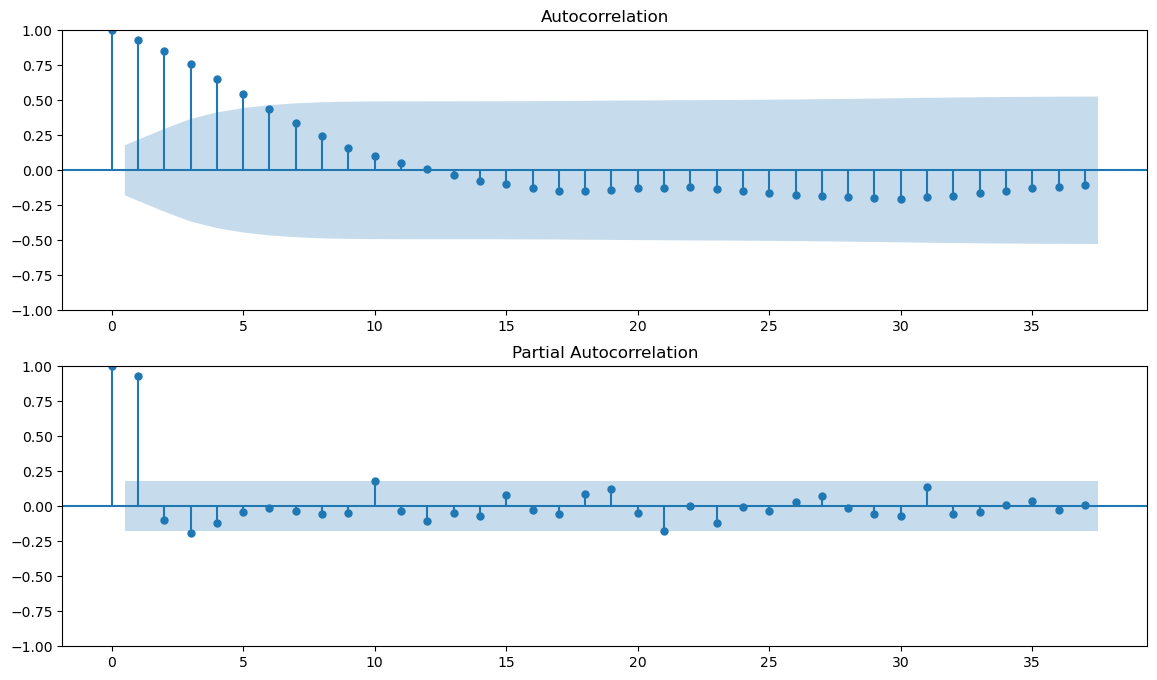

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,8), sharex=False, sharey=False)
ax1 = plot_acf(data['dollar'], lags=37, ax=ax1)
ax2 = plot_pacf(data['dollar'], lags=37, ax=ax2)
plt.show()

#### ces lignes fournissent des informations sur la stationnarité des données en se basant sur le test ADF, en utilisant la statistique de test, la p-value et les valeurs critiques.

In [22]:
result = adfuller(data['dollar'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.450177
p-value: 0.128072
Critical Test Statistics Values:
	1%: -3.488
	5%: -2.887
	10%: -2.580


#### Ce code calcule une différence de seconde ordre avec un décalage de 30 jours sur les données contenues dans la colonne 'dollar' du DataFrame `data`. Ensuite, il supprime les valeurs manquantes résultantes à l'aide de `dropna()`.

#### Enfin, le code trace les données transformées (`time_series_diff`) sur un graphique à l'aide de Matplotlib, avec une taille de figure définie sur 14 pouces de largeur et 4 pouces de hauteur.

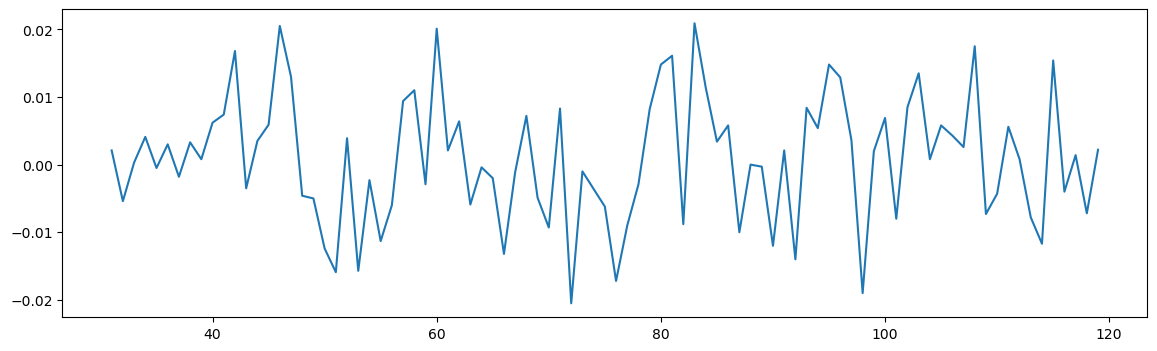

In [23]:
time_series_diff = data['dollar'].diff().diff(30)
time_series_diff.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(14,4))
time_series_diff.plot(ax=ax)
plt.show()

In [24]:
result = adfuller(time_series_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.250665
p-value: 0.000000
Critical Test Statistics Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585


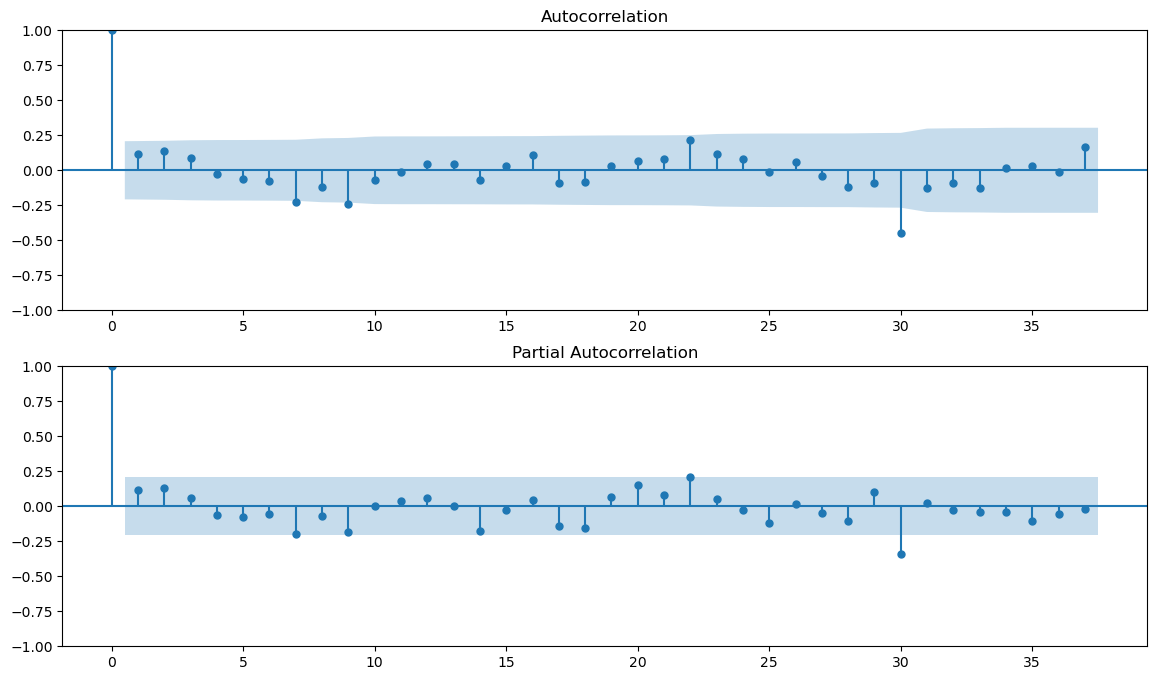

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,8), sharex=False, sharey=False)
ax1 = plot_acf(time_series_diff, lags=37, ax=ax1)
ax2 = plot_pacf(time_series_diff, lags=37, ax=ax2)
plt.show()

#### le code automatise le processus de sélection du meilleur modèle SARIMA pour modéliser les données de la colonne 'dollar', ce qui facilite l'analyse et la prévision des séries temporelles

In [26]:
model = pm.auto_arima(data['dollar'], d=1, D=1 ,seasonal=True, m = 30 ,start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[30]             : AIC=-614.360, Time=10.45 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=-576.432, Time=0.79 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=-606.472, Time=6.82 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=9.27 sec
 ARIMA(0,1,0)(0,1,1)[30]             : AIC=inf, Time=6.45 sec
 ARIMA(0,1,0)(1,1,0)[30]             : AIC=-608.487, Time=3.00 sec
 ARIMA(0,1,0)(2,1,1)[30]             : AIC=-618.207, Time=58.28 sec
 ARIMA(0,1,0)(2,1,0)[30]             : AIC=inf, Time=11.63 sec
 ARIMA(0,1,0)(2,1,2)[30]             : AIC=inf, Time=33.38 sec
 ARIMA(0,1,0)(1,1,2)[30]             : AIC=-612.372, Time=15.17 sec
 ARIMA(1,1,0)(2,1,1)[30]             : AIC=-608.834, Time=13.14 sec
 ARIMA(0,1,1)(2,1,1)[30]             : AIC=-610.570, Time=23.64 sec
 ARIMA(1,1,1)(2,1,1)[30]             : AIC=-614.202, Time=58.71 sec
 ARIMA(0,1,0)(2,1,1)[30] intercept   : AIC=-611.995, Time=15.97 sec

Best model:  ARIMA(0,1,0)(2,1

#### Ce code divise les données en ensembles d'entraînement (train) et de test (test). Il utilise les 80 % premières lignes des données pour l'ensemble d'entraînement et les 20 % restantes pour l'ensemble de test.

<Axes: >

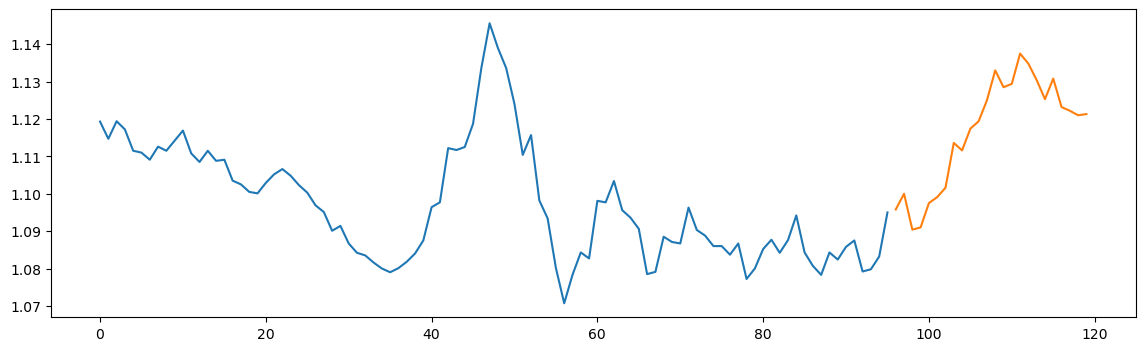

In [27]:
train = data[:int(0.8*(120))]
test = data[int(0.8*(120)):]

plt.figure(figsize=(14,4))
train['dollar'].plot()
test['dollar'].plot()

#### Ce code ajuste un modèle SARIMA-X aux données d'entraînement de la colonne 'dollar' du DataFrame data

In [28]:
model = SARIMAX(train['dollar'],order=(0,1,0),seasonal_order=(2,1,1,30))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

/home/mohamed-tahiri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.18717D+00    |proj g|=  1.26915D+00

At iterate    5    f= -2.29917D+00    |proj g|=  3.42854D+01

At iterate   10    f= -2.35140D+00    |proj g|=  2.91046D-01

At iterate   15    f= -2.35303D+00    |proj g|=  5.30552D-01

At iterate   20    f= -2.35441D+00    |proj g|=  8.51158D-02

At iterate   25    f= -2.35441D+00    |proj g|=  6.89147D-02
  ys=-9.706E-07  -gs= 1.155E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Results of SARIMAX on train
                                      SARIMAX Results                                       
Dep. Variable:                               dollar   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 30)   Log Likelihood                 226.024
Date:                              Sun, 12 May 2024   AIC                           -444.047
Time:                                      21:41:14   BIC                           -435.350
Sample:                                           0   HQIC                          -440.616
                                               - 96                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L30      -0.3685      0.240     -1.535      0.125      -0.839    

#### Ce code affiche les diagnostics du modèle SARIMA-X ajusté aux données d'entraînement

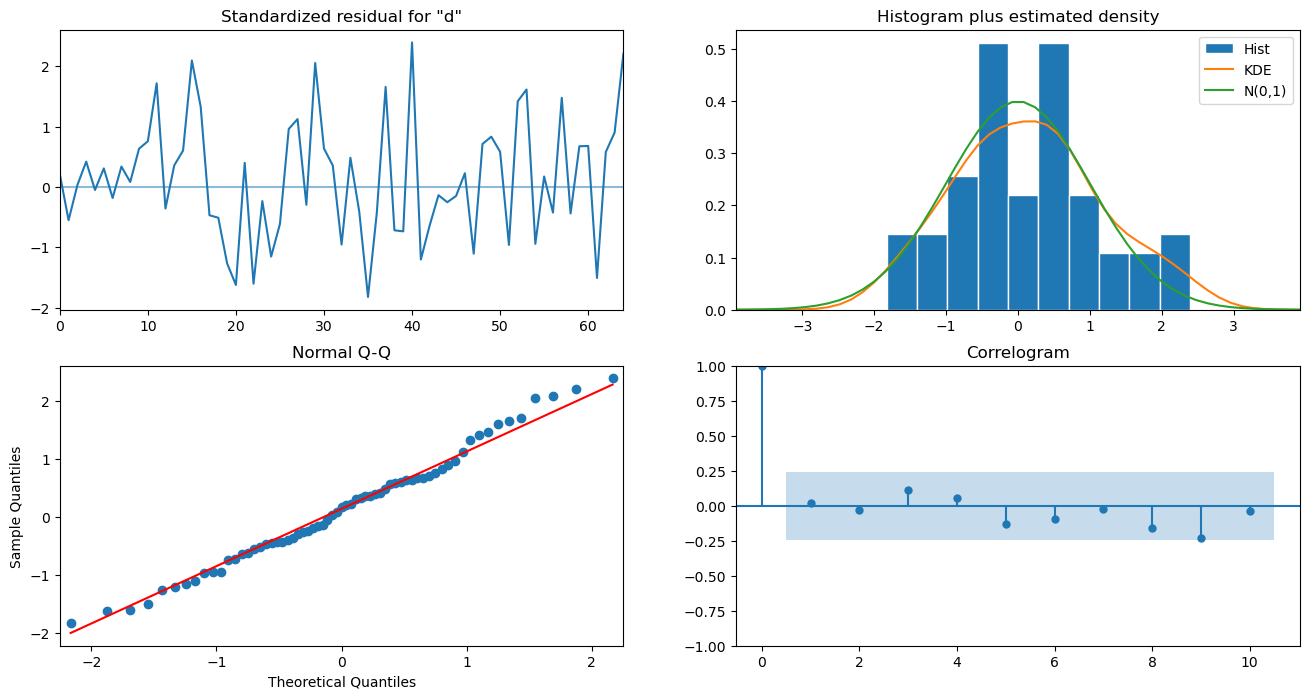

In [29]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Ce code génère des prévisions à partir du modèle SARIMA-X ajusté pour la série temporelle 'dollar', Cela permet de visualiser les prévisions générées par le modèle par rapport aux données réelles.

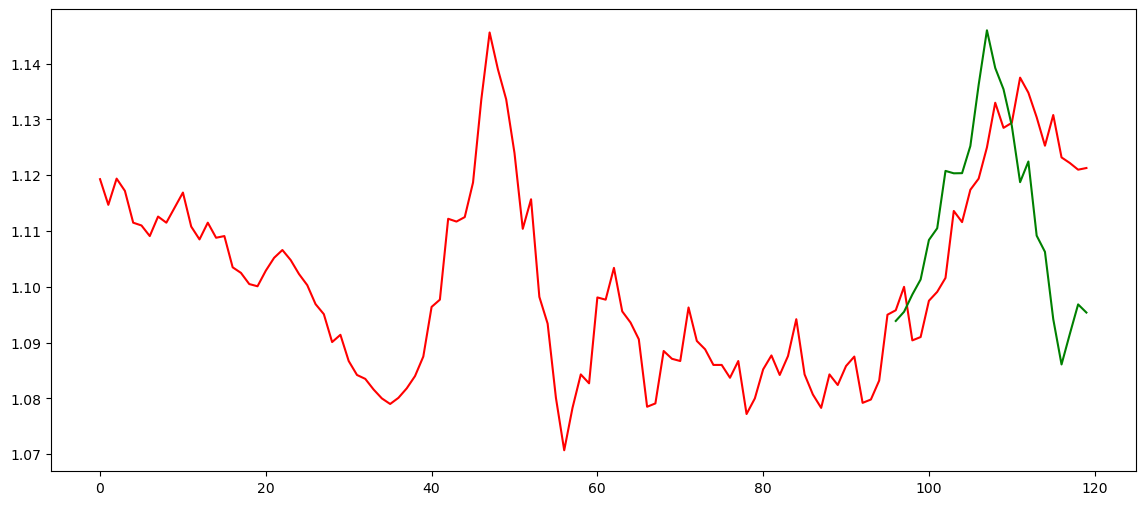

In [30]:
forecast = results.get_forecast(steps=len(test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = mean.index
plt.figure(figsize=(14,6))
plt.plot(data['dollar'].index, data['dollar'], color = 'red')
plt.plot(d, mean, color= 'green')
plt.show()